# Analysis of cycling in different London Boroughs


In [1]:
# Import all the necessary packages.
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import data
outer_london = pd.read_csv('outer_london_clean.csv')
central_london = pd.read_csv('central_london_clean.csv')
inner_london = pd.read_csv('inner_london_clean.csv')

# Check data is imported correctly
print(outer_london.shape)
print(outer_london.dtypes)
print(central_london.shape)
print(central_london.dtypes)
print(inner_london.shape)
print(inner_london.dtypes)

(375613, 12)
year               int64
Location          object
Day               object
Date              object
Weather           object
Time              object
Period            object
Direction         object
male_cycles        int64
female_cycles      int64
unknown_cycles     int64
total_cycles       int64
dtype: object
(758096, 12)
year                 int64
quarter             object
Location            object
Day                 object
Date                object
Weather             object
Time                object
Period              object
Direction           object
private_cycles       int64
hire_bike_cycles     int64
total_cycles         int64
dtype: object
(508705, 11)
year              float64
Location           object
Day                object
Date               object
Weather            object
Time               object
Period             object
Direction          object
private_cycles    float64
hire_cycles       float64
total_cycles      float64
dtype: object


In [3]:
outer_london.head()

,year,Location,Day,Date,Weather,Time,Period,Direction,male_cycles,female_cycles,unknown_cycles,total_cycles
0,2015,High Road Leyton,fri,2015-06-26,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,2,1,0,3
1,2015,High Road Leyton,fri,2015-06-26,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,3,0,0,3
2,2015,High Road Leyton,fri,2015-06-26,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,2,0,0,2
3,2015,High Road Leyton,fri,2015-06-26,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,4,0,0,4
4,2015,High Road Leyton,fri,2015-06-26,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,4,1,0,5


In [4]:
central_london.head()

,year,quarter,Location,Day,Date,Weather,Time,Period,Direction,private_cycles,hire_bike_cycles,total_cycles
0,2014,Q1,Millbank (south of Thorney Street),fri,2014-01-24,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,0,0,0
1,2014,Q1,Millbank (south of Thorney Street),fri,2014-01-24,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,15,0,15
2,2014,Q1,Millbank (south of Thorney Street),fri,2014-01-24,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,35,0,35
3,2014,Q1,Millbank (south of Thorney Street),fri,2014-01-24,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,59,2,61
4,2014,Q1,Millbank (south of Thorney Street),fri,2014-01-24,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,73,0,73


In [5]:
inner_london.head()

,year,Location,Day,Date,Weather,Time,Period,Direction,private_cycles,hire_cycles,total_cycles
0,2015.0,Grove Road,wed,2015-05-20,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,1.0,0.0,1.0
1,2015.0,Grove Road,wed,2015-05-20,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,2.0,0.0,2.0
2,2015.0,Grove Road,wed,2015-05-20,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,2.0,0.0,2.0
3,2015.0,Grove Road,wed,2015-05-20,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,4.0,0.0,4.0
4,2015.0,Grove Road,wed,2015-05-20,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,4.0,0.0,4.0


### Observe the outliers in all of the data sets

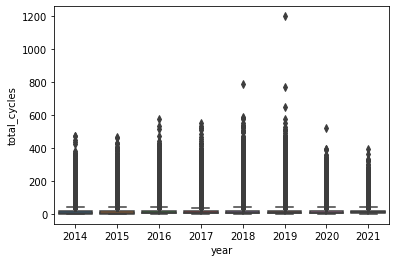

In [6]:
# Create a countplot based on number of movies streamed by Netflix per age group.
sns.boxplot(x='year', y='total_cycles', data=central_london)

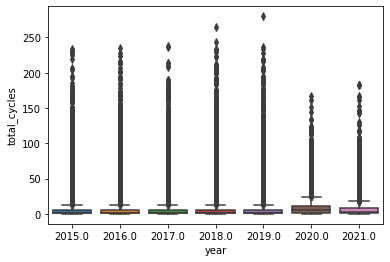

In [7]:
sns.boxplot(x='year', y='total_cycles', data=inner_london)

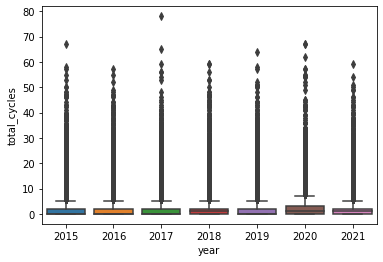

In [8]:
sns.boxplot(x='year', y='total_cycles', data=outer_london)

There are a large number of data entries for 0 cycles leading to a large number of outliers. The data is strongly skewed.

### What is the the spread between men and women?

In [9]:
men= outer_london['male_cycles'].sum()
men

501524

In [10]:
women= outer_london['female_cycles'].sum()
women

90397

In [11]:
# Percentage of men in cyclists
men_cyclists= (men/(women+men))*100
men_cyclists

84.72819852649256

85% of cyclists in our dataset are men. Males are overrepresented.

### What time of the day is busiest?

In [12]:
df1= central_london.groupby(['Period'])['total_cycles']\
.agg('sum').reset_index()
df1.sort_values(by="total_cycles", ascending=False)

,Period,total_cycles
0,AM peak (07:00-10:00),4241384
4,PM peak (16:00-19:00),4013360
3,Inter-peak (10:00-16:00),2286024
2,Evening (19:00-22:00),1766291
1,Early Morning (06:00-07:00),318603


### What locations have the highest number of cyclists?

In [13]:
df2= central_london.groupby(['Location'])['total_cycles']\
.agg('sum').reset_index()
df2.sort_values(by="total_cycles", ascending=False).head(11)

,Location,total_cycles
20,Borough High Street,278836
15,Blackfriars Bridge,258616
101,London Bridge,253538
120,New Bridge Street,248824
189,Victoria Embankment (by Cleopatra's Needle),229161
169,Temple,228841
193,Waterloo Bridge,207229
53,Farringdon Street,205014
22,Bridge Street,201902
110,Millbank (north of Great Peter Street),174846


In [14]:
df3= outer_london.groupby(['Location'])['total_cycles']\
.agg('sum').reset_index()
df3.sort_values(by="total_cycles", ascending=False).head(10)

,Location,total_cycles
184,High Road,23012
79,Chiswick High Road,16066
228,London Road,13581
187,High Street,10522
220,Lewisham High Street,10246
324,Sheen Road,9077
368,The Mall,8385
164,Greenway (Manor Road),8334
315,Romford Road,8324
212,Kingston Road,8283


### What year had the highest number of cyclists?

In [15]:
df4= central_london.groupby(['year'])['total_cycles']\
.agg('sum').reset_index()
df4.sort_values(by="total_cycles", ascending=False)

,year,total_cycles
5,2019,1907780
4,2018,1891390
3,2017,1739412
2,2016,1724842
1,2015,1636501
0,2014,1603639
7,2021,1269447
6,2020,852651


The collection of data in 2020 and 2021 was affected by the pandemic.

/Users/enorabarbier/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 <a list of 29 Text xticklabel objects>)

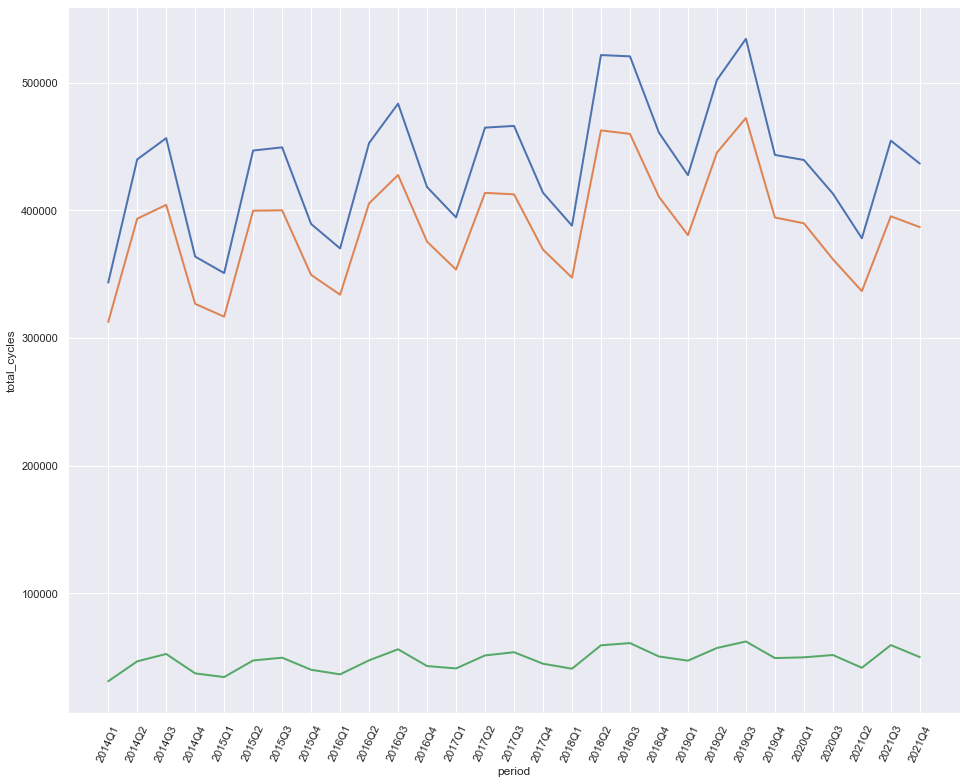

In [16]:
df5= central_london.groupby(['year', 'quarter'])['private_cycles', 'hire_bike_cycles','total_cycles']\
.agg('sum').reset_index()

# Group data by quarter of their respective years
df5["period"] = df5["year"].astype(str) + df5["quarter"]

sns.set(rc= {'figure.figsize':(16,13)})
sns.lineplot(x='period', y='total_cycles', data= df5, linewidth=2)
sns.lineplot(x='period', y='private_cycles', data= df5, linewidth=2)
sns.lineplot(x='period', y='hire_bike_cycles', data= df5, linewidth=2)
plt.xticks(rotation=65, fontsize=11)

### Exploration of the direction in which cyclists travel

In [17]:
# Subset which only includes Data for Blackfriars Bridge Location during the AM peak
Blackfriar_morning = central_london[(central_london["Location"] == "Blackfriars Bridge")
               & (central_london["Period"] == "AM peak (07:00-10:00)")]


# Check DataFrame has been properly filtered.
Blackfriar_morning.head()

,year,quarter,Location,Day,Date,Weather,Time,Period,Direction,private_cycles,hire_bike_cycles,total_cycles
3716,2014,Q1,Blackfriars Bridge,mon,2014-01-27,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,54,15,69
3717,2014,Q1,Blackfriars Bridge,mon,2014-01-27,Dry,0715 - 0730,AM peak (07:00-10:00),Northbound,78,16,94
3718,2014,Q1,Blackfriars Bridge,mon,2014-01-27,Wet,0730 - 0745,AM peak (07:00-10:00),Northbound,103,20,123
3719,2014,Q1,Blackfriars Bridge,mon,2014-01-27,Wet,0745 - 0800,AM peak (07:00-10:00),Northbound,133,33,166
3720,2014,Q1,Blackfriars Bridge,mon,2014-01-27,Dry,0800 - 0815,AM peak (07:00-10:00),Northbound,171,40,211


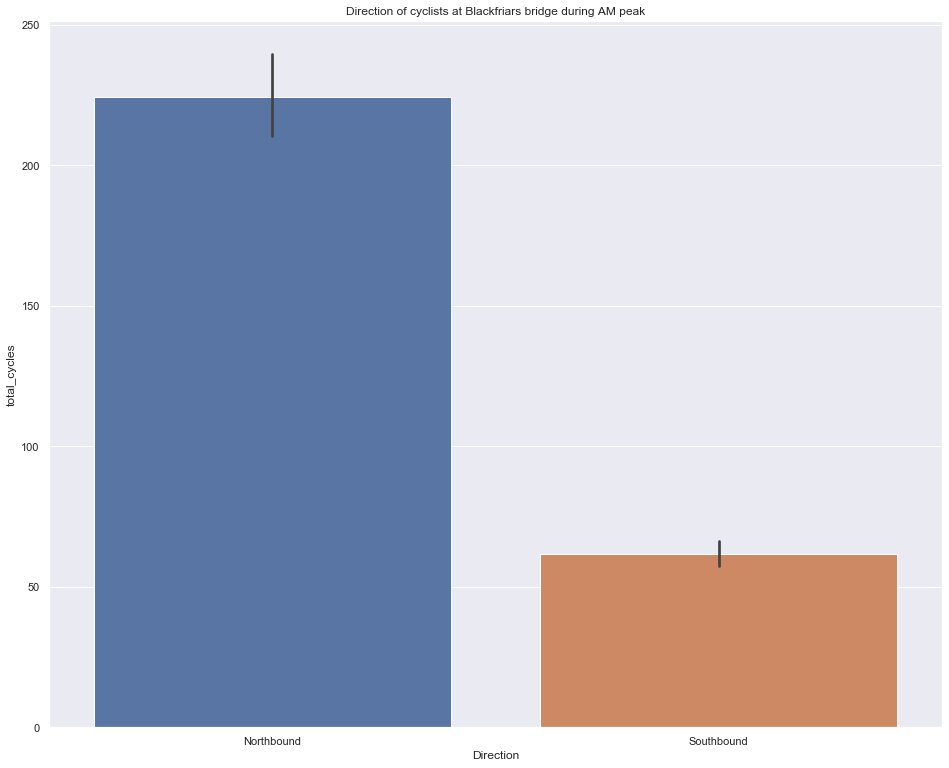

In [18]:
# Create a barplot on the direction of cyclists in the morning
plt.title('Direction of cyclists at Blackfriars bridge during AM peak')
sns.barplot(x='Direction', y='total_cycles', data=Blackfriar_morning)

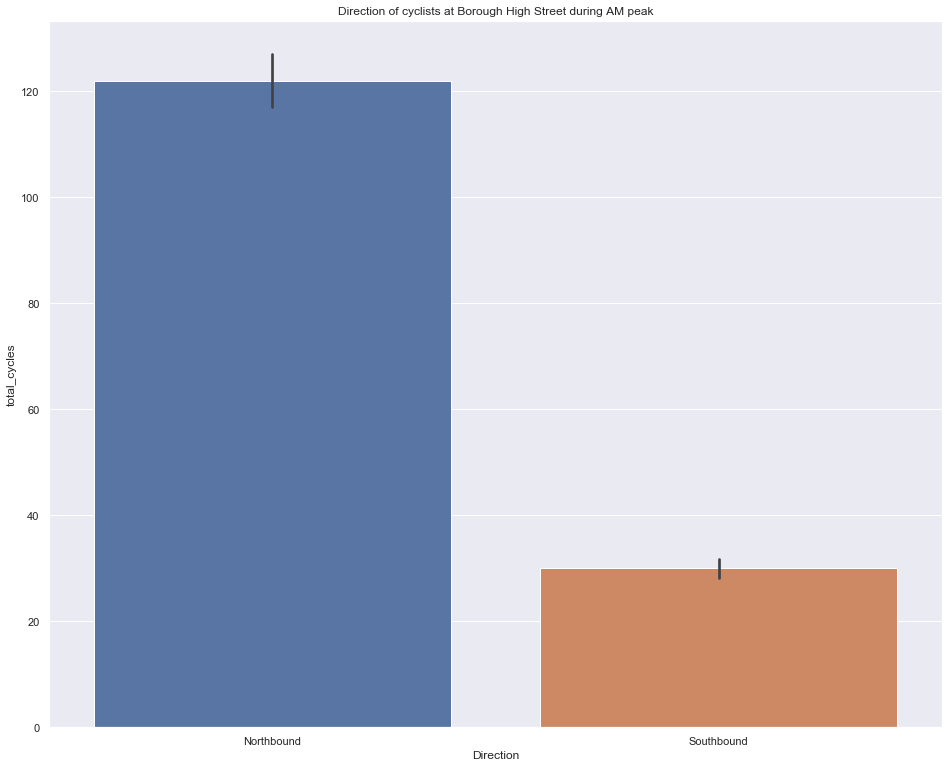

In [19]:
# Subset which only includes Data for Borough Street Location during the AM peak
Borough_St_morning = central_london[(central_london["Location"] == "Borough High Street")
               & (central_london["Period"] == "AM peak (07:00-10:00)")]

# Create a barplot on the effect of weather on cycling
plt.title('Direction of cyclists at Borough High Street during AM peak')
sns.barplot(x='Direction', y='total_cycles',data=Borough_St_morning)

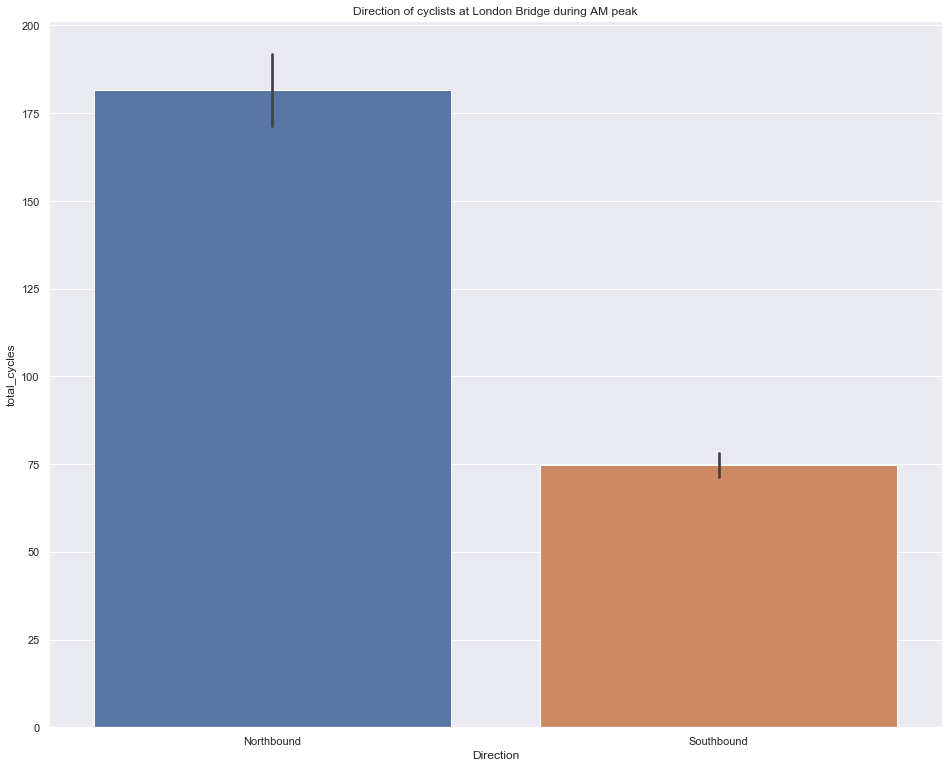

In [20]:
# Subset which only includes Data for London Bridge Location during the AM peak
London_Bridge_morning = central_london[(central_london["Location"] == "London Bridge")
               & (central_london["Period"] == "AM peak (07:00-10:00)")]

# Create a barplot on the effect of weather on cycling
plt.title('Direction of cyclists at London Bridge during AM peak')
sns.barplot(x='Direction', y='total_cycles',data=London_Bridge_morning)

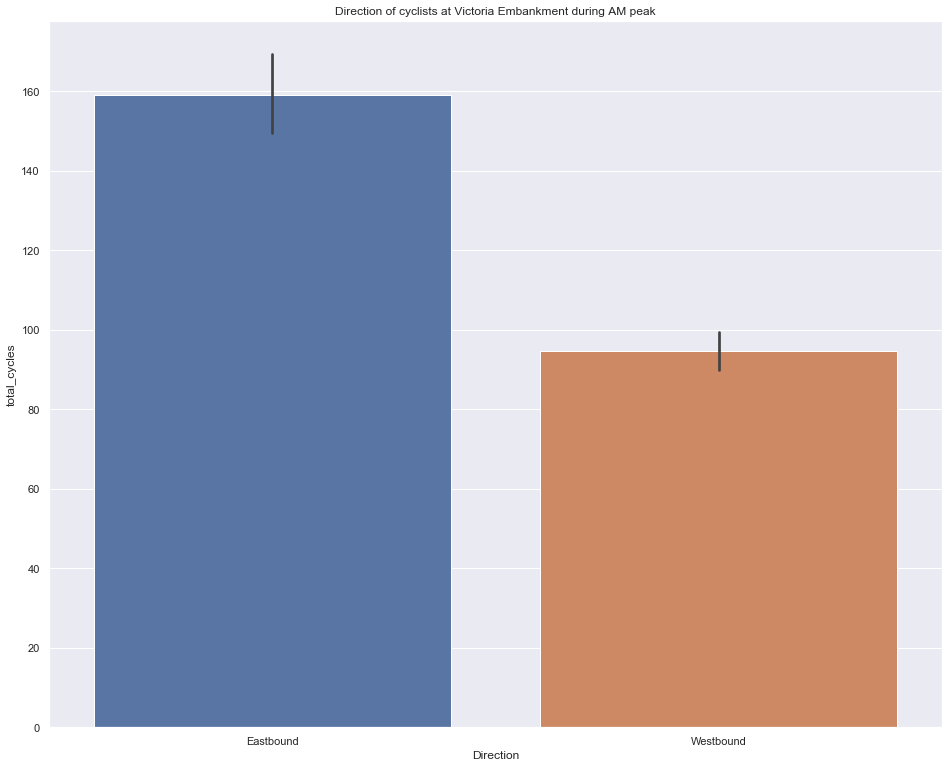

In [21]:
# Subset which only includes Data for Victoria Embankment Location during the AM peak
Victoria_morning = central_london[(central_london["Location"] == "Victoria Embankment (by Cleopatra's Needle)")
               & (central_london["Period"] == "AM peak (07:00-10:00)")]

# Create a barplot on the effect of weather on cycling
plt.title('Direction of cyclists at Victoria Embankment during AM peak')
sns.barplot(x='Direction', y='total_cycles',data=Victoria_morning)

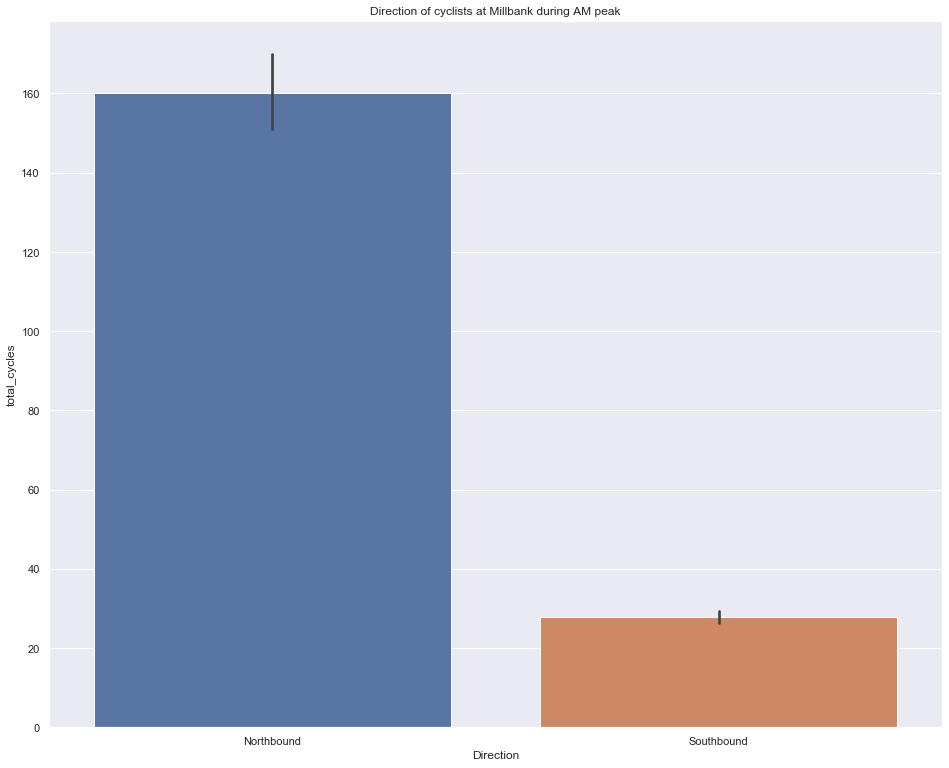

In [22]:
# Subset which only includes Data for Millbank Location during the AM peak
Millbank_morning = central_london[(central_london["Location"] == "Millbank (north of Great Peter Street)")
               & (central_london["Period"] == "AM peak (07:00-10:00)")]

# Create a barplot on the effect of weather on cycling
plt.title('Direction of cyclists at Millbank during AM peak')
sns.barplot(x='Direction', y='total_cycles',data=Millbank_morning)

Most cyclists travel in the direction of the city during the AM peak.

## Infastructure data

In [23]:
# Import data
df_inf = pd.read_csv('cycling_infrastructure.csv')

print(df_inf.dtypes)
df_inf.head()

geometry.type            object
geometry.coordinates     object
properties.SVDATE        object
properties.BOROUGH       object
infrastructure           object
longitude               float64
latitude                float64
dtype: object


,geometry.type,geometry.coordinates,properties.SVDATE,properties.BOROUGH,infrastructure,longitude,latitude
0,Point,"[-0.2427797672, 51.5103212773]",2017-09-07,Hammersmith & Fulham,parking,-0.242780,51.510321
1,Point,"[-0.2427846609, 51.5102610544]",2017-09-07,Hammersmith & Fulham,parking,-0.242785,51.510261
2,Point,"[-0.2405751224, 51.5014706358]",2017-06-20,Hammersmith & Fulham,parking,-0.240575,51.501471
3,Point,"[-0.2382877591, 51.5065007339]",2017-06-24,Hammersmith & Fulham,parking,-0.238288,51.506501
4,Point,"[-0.2384457427, 51.5062848196]",2017-09-07,Hammersmith & Fulham,parking,-0.238446,51.506285


In [24]:
# Check for null values
df_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83209 entries, 0 to 83208
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   geometry.type         83209 non-null  object 
 1   geometry.coordinates  83209 non-null  object 
 2   properties.SVDATE     83209 non-null  object 
 3   properties.BOROUGH    83209 non-null  object 
 4   infrastructure        83209 non-null  object 
 5   longitude             83209 non-null  float64
 6   latitude              83209 non-null  float64
dtypes: float64(2), object(5)
memory usage: 4.4+ MB


In [25]:
# Rename columns
df_inf = df_inf.rename(columns={'geometry.type': 'Type', 'properties.SVDATE': 'Date', 'properties.BOROUGH': 'Borough'})

df_inf.head()

,Type,geometry.coordinates,Date,Borough,infrastructure,longitude,latitude
0,Point,"[-0.2427797672, 51.5103212773]",2017-09-07,Hammersmith & Fulham,parking,-0.242780,51.510321
1,Point,"[-0.2427846609, 51.5102610544]",2017-09-07,Hammersmith & Fulham,parking,-0.242785,51.510261
2,Point,"[-0.2405751224, 51.5014706358]",2017-06-20,Hammersmith & Fulham,parking,-0.240575,51.501471
3,Point,"[-0.2382877591, 51.5065007339]",2017-06-24,Hammersmith & Fulham,parking,-0.238288,51.506501
4,Point,"[-0.2384457427, 51.5062848196]",2017-09-07,Hammersmith & Fulham,parking,-0.238446,51.506285


In [26]:
# Change date column to datetime
df_inf['Date'] = pd.to_datetime(df_inf['Date'])

#Check date has been converted correctly
print(df_inf['Date'].dtypes)
df_inf.head()

datetime64[ns]


,Type,geometry.coordinates,Date,Borough,infrastructure,longitude,latitude
0,Point,"[-0.2427797672, 51.5103212773]",2017-09-07,Hammersmith & Fulham,parking,-0.242780,51.510321
1,Point,"[-0.2427846609, 51.5102610544]",2017-09-07,Hammersmith & Fulham,parking,-0.242785,51.510261
2,Point,"[-0.2405751224, 51.5014706358]",2017-06-20,Hammersmith & Fulham,parking,-0.240575,51.501471
3,Point,"[-0.2382877591, 51.5065007339]",2017-06-24,Hammersmith & Fulham,parking,-0.238288,51.506501
4,Point,"[-0.2384457427, 51.5062848196]",2017-09-07,Hammersmith & Fulham,parking,-0.238446,51.506285


In [27]:
# Create a column with year so that visualistions can be made with year.
df_inf['Year'] = df_inf['Date'].dt.year
df_inf.head()

,Type,geometry.coordinates,Date,Borough,infrastructure,longitude,latitude,Year
0,Point,"[-0.2427797672, 51.5103212773]",2017-09-07,Hammersmith & Fulham,parking,-0.242780,51.510321,2017
1,Point,"[-0.2427846609, 51.5102610544]",2017-09-07,Hammersmith & Fulham,parking,-0.242785,51.510261,2017
2,Point,"[-0.2405751224, 51.5014706358]",2017-06-20,Hammersmith & Fulham,parking,-0.240575,51.501471,2017
3,Point,"[-0.2382877591, 51.5065007339]",2017-06-24,Hammersmith & Fulham,parking,-0.238288,51.506501,2017
4,Point,"[-0.2384457427, 51.5062848196]",2017-09-07,Hammersmith & Fulham,parking,-0.238446,51.506285,2017


In [28]:
df_inf.infrastructure.value_counts()

traffic_calming    58565
parking            23758
signal               443
signage              443
Name: infrastructure, dtype: int64

In [29]:
# Group data by year
borough_count= df_inf.groupby(['Borough'])['Borough'].count().reset_index(name="count").sort_values('count', ascending=False)
borough_count

,Borough,count
11,Hackney,5265
27,Southwark,5141
21,Lambeth,4506
22,Lewisham,4089
8,Ealing,3861
24,Newham,3660
3,Brent,3412
18,Islington,3386
5,Camden,3375
29,Tower Hamlets,3289


### Infrastructure in London Boroughs

Text(0.5, 1.0, 'Boroughs with highest infrastructure installation (2017-2019)')

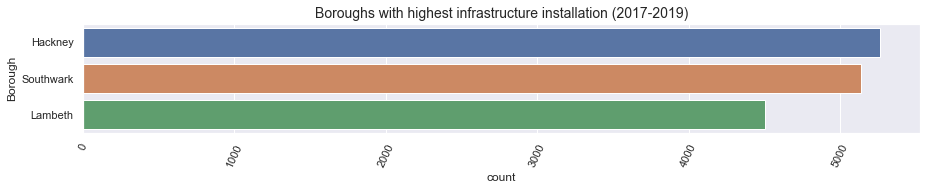

In [30]:
# Create a barplot to show the boroughs with the highest number of infrastructure points 
borough_top = borough_count[borough_count["count"]>4300]
sns.set(rc= {'figure.figsize':(15,2)})
sns.barplot(y='Borough', x='count', data=borough_top)
plt.xticks(rotation=65, fontsize=11)
plt.title('Boroughs with highest infrastructure installation (2017-2019)', fontsize = 14)

Text(0.5, 1.0, 'Boroughs with lowest infrastructure installation (2017-2019)')

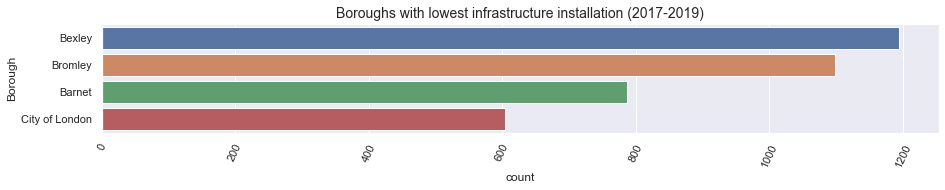

In [31]:
# Create a barplot to show the boroughs with the lowest number of infrastructure points
borough_top = borough_count[borough_count["count"]<1200]
sns.set(rc= {'figure.figsize':(15,2)})
sns.barplot(y='Borough', x='count', data=borough_top)
plt.xticks(rotation=65, fontsize=11)
plt.title('Boroughs with lowest infrastructure installation (2017-2019)', fontsize = 14)

(66221, 8)


Text(0.5, 1.0, 'Number of infrastructure installed by Borough in 2017')

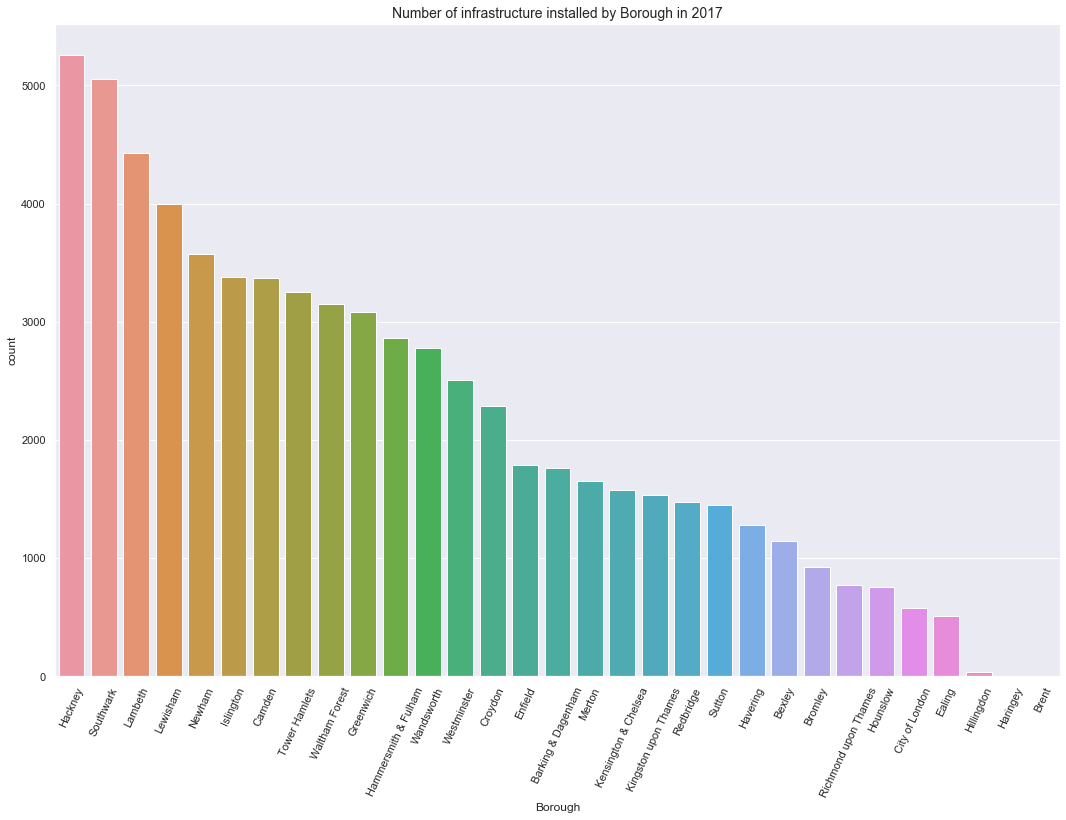

In [32]:
# Count of infrastructure by borough in 2017
inf_2017 = df_inf[(df_inf["Year"] == 2017)]
print(inf_2017.shape)
borough_2017= inf_2017.groupby(['Borough'])['Borough'].count().reset_index(name="count").sort_values('count', ascending=False)

#Barplot
sns.set(rc= {'figure.figsize':(18,12)})
sns.barplot(x='Borough', y='count', data=borough_2017)
plt.xticks(rotation=65, fontsize=11)
plt.title('Number of infrastructure installed by Borough in 2017', fontsize = 14)

(16981, 8)


Text(0.5, 1.0, 'Number of infrastructure installed by Borough in 2018')

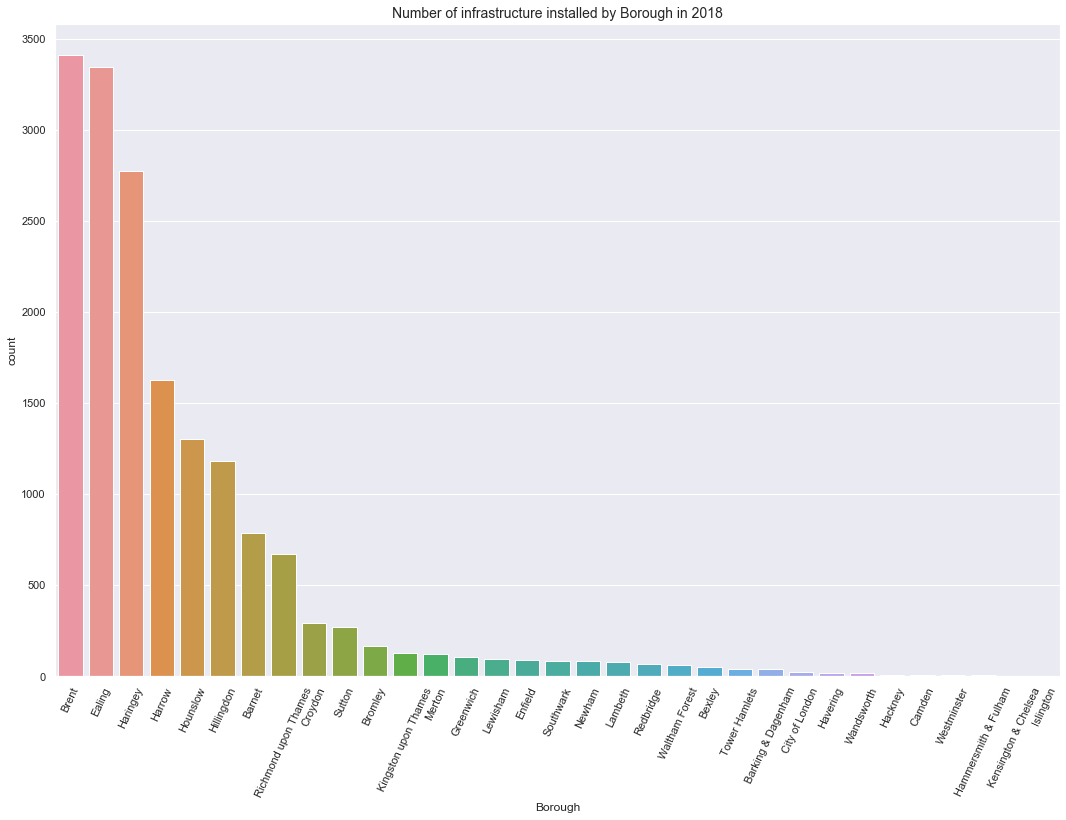

In [33]:
# Count of infrastructure by borough in 2018
inf_2018 = df_inf[(df_inf["Year"] == 2018)]
print(inf_2018.shape)
borough_2018= inf_2018.groupby(['Borough'])['Borough'].count().reset_index(name="count").sort_values('count', ascending=False)

#Barplot
sns.set(rc= {'figure.figsize':(18,12)})
sns.barplot(x='Borough', y='count', data=borough_2018)
plt.xticks(rotation=65, fontsize=11)
plt.title('Number of infrastructure installed by Borough in 2018', fontsize = 14)

(7, 8)


Text(0.5, 1.0, 'Number of infrastructure installed by Borough in 2019')

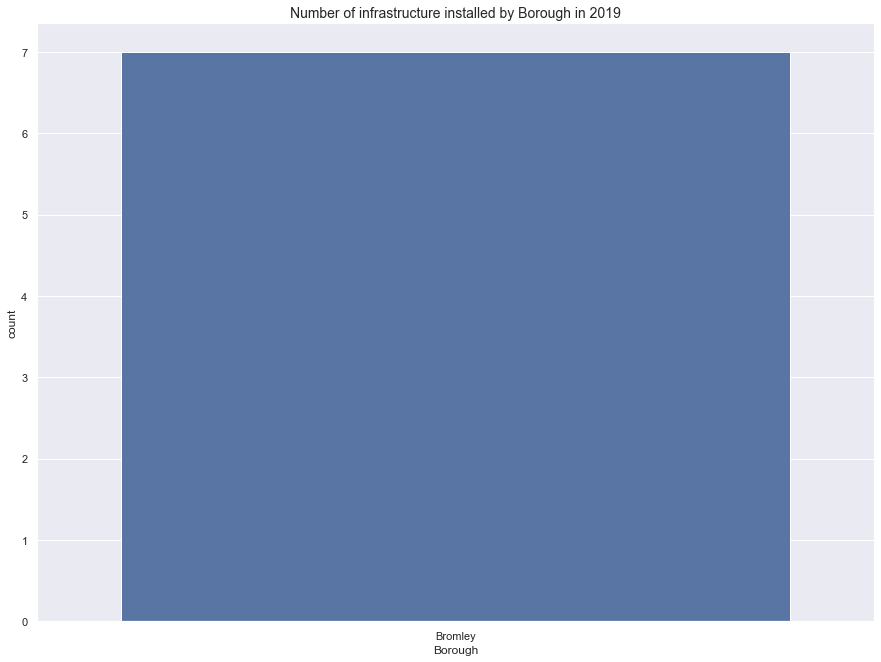

In [34]:
# Count of infrastructure by borough in 2019
inf_2019 = df_inf[(df_inf["Year"] == 2019)]
print(inf_2019.shape)
borough_2019= inf_2019.groupby(['Borough'])['Borough'].count().reset_index(name="count").sort_values('count', ascending=False)

#Barplot
sns.set(rc= {'figure.figsize':(15,11)})
sns.barplot(x='Borough', y='count', data=borough_2019)
plt.title('Number of infrastructure installed by Borough in 2019', fontsize = 14)

In [35]:
# Import london data
all_london = pd.read_csv('all_london.csv')

all_london.head()

,year,Location,Day,Date,Weather,Time,Period,Direction,total_cycles,region,Site ID,Borough,Functional area for monitoring,Road type,Is it on the strategic CIO panel?,Easting (UK Grid),Northing (UK Grid),Latitude,Longitude
0,2015,Grove Road,wed,2015-05-20,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,1.0,inner,INNCY001,Tower Hamlets,Inner,A Road,1.0,536005.2346,183224.9317,51.531550,-0.040644
1,2015,Grove Road,wed,2015-05-20,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,1.0,inner,OUTCY196,Merton,Outer,Minor Road,1.0,528490.5540,169294.7891,51.408123,-0.153983
2,2015,Grove Road,wed,2015-05-20,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,2.0,inner,INNCY001,Tower Hamlets,Inner,A Road,1.0,536005.2346,183224.9317,51.531550,-0.040644
3,2015,Grove Road,wed,2015-05-20,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,2.0,inner,OUTCY196,Merton,Outer,Minor Road,1.0,528490.5540,169294.7891,51.408123,-0.153983
4,2015,Grove Road,wed,2015-05-20,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,2.0,inner,INNCY001,Tower Hamlets,Inner,A Road,1.0,536005.2346,183224.9317,51.531550,-0.040644


### Cycling in London Boroughs

In [36]:
# Group cycling data by borough
all_london = all_london.rename(columns={'year': 'Year'})
borough_cycling= all_london.groupby(['Borough'])['total_cycles']\
.agg('sum').reset_index().sort_values('total_cycles', ascending=False)
borough_cycling

,Borough,total_cycles
32,Westminster,1622330.0
6,City of London,1260709.0
27,Southwark,1202334.0
5,Camden,1023007.0
18,Islington,972878.0
21,Lambeth,751775.0
11,Hackney,567123.0
19,Kensington & Chelsea,394136.0
29,Tower Hamlets,393534.0
31,Wandsworth,391424.0


Text(0.5, 1.0, 'Cycling count by Borough')

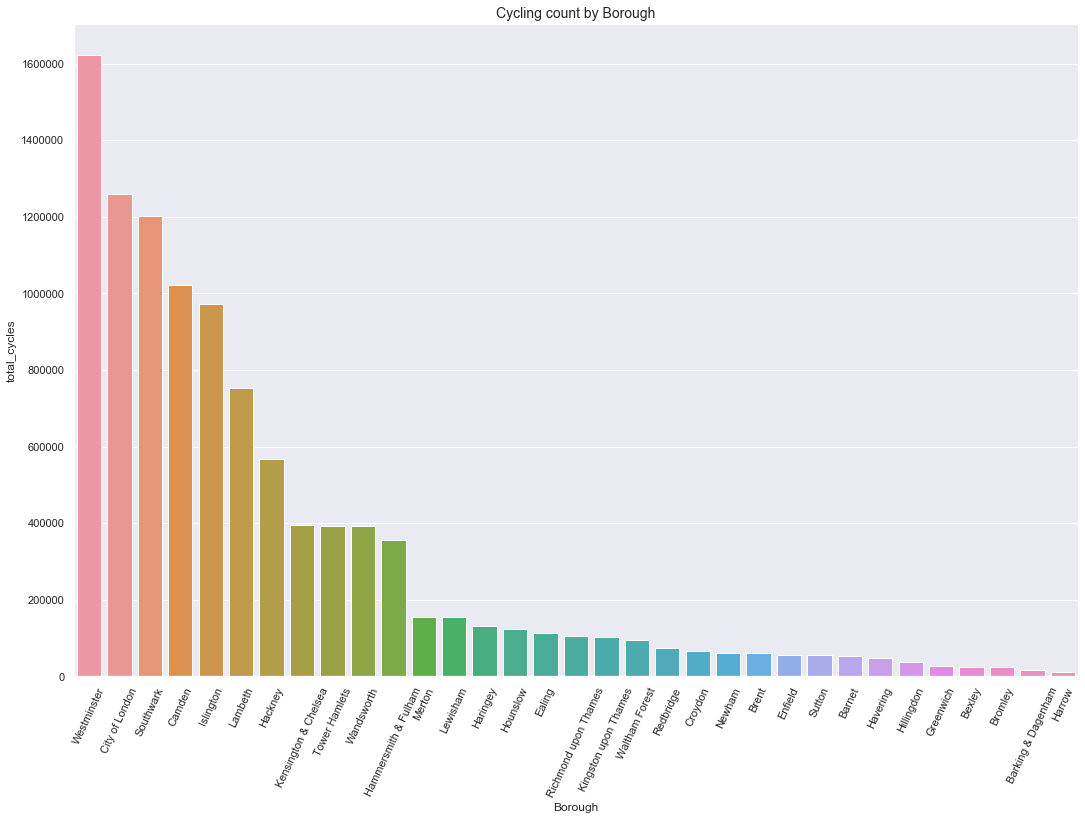

In [37]:
# Create a barplot to show the number of cyclists by borough
sns.set(rc= {'figure.figsize':(18,12)})
sns.barplot(x='Borough', y='total_cycles', data=borough_cycling)
plt.xticks(rotation=65, fontsize=11)
plt.title('Cycling count by Borough', fontsize = 14)

### Divide cycling data by borough for different years

Text(0.5, 1.0, 'Cycling count by Borough in 2017')

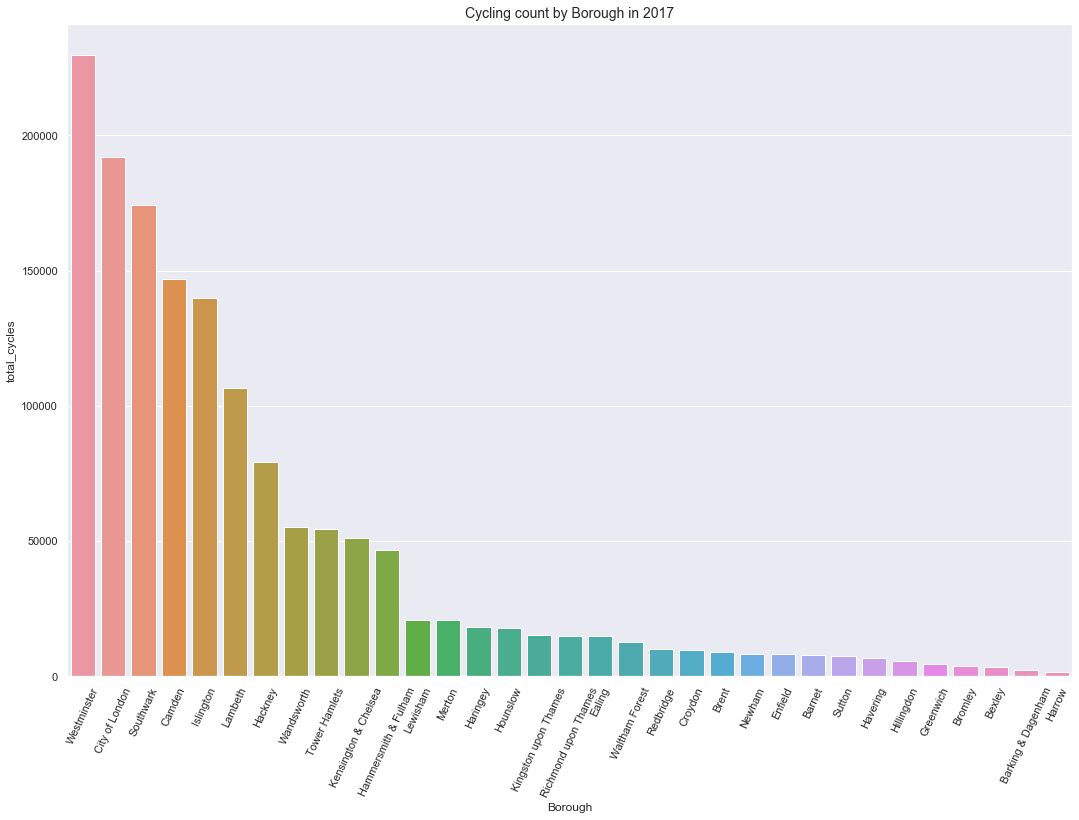

In [38]:
# Count of infrastructure by borough in 2017
cyc_2017 = all_london[(all_london["Year"] == 2017)]
borough_cyc_2017= cyc_2017.groupby(['Borough'])['total_cycles']\
.agg('sum').reset_index().sort_values('total_cycles', ascending=False)

#Barplot
sns.set(rc= {'figure.figsize':(18,12)})
sns.barplot(x='Borough', y='total_cycles', data=borough_cyc_2017)
plt.xticks(rotation=65, fontsize=11)
plt.title('Cycling count by Borough in 2017', fontsize = 14)

Text(0.5, 1.0, 'Cycling count by Borough in 2018')

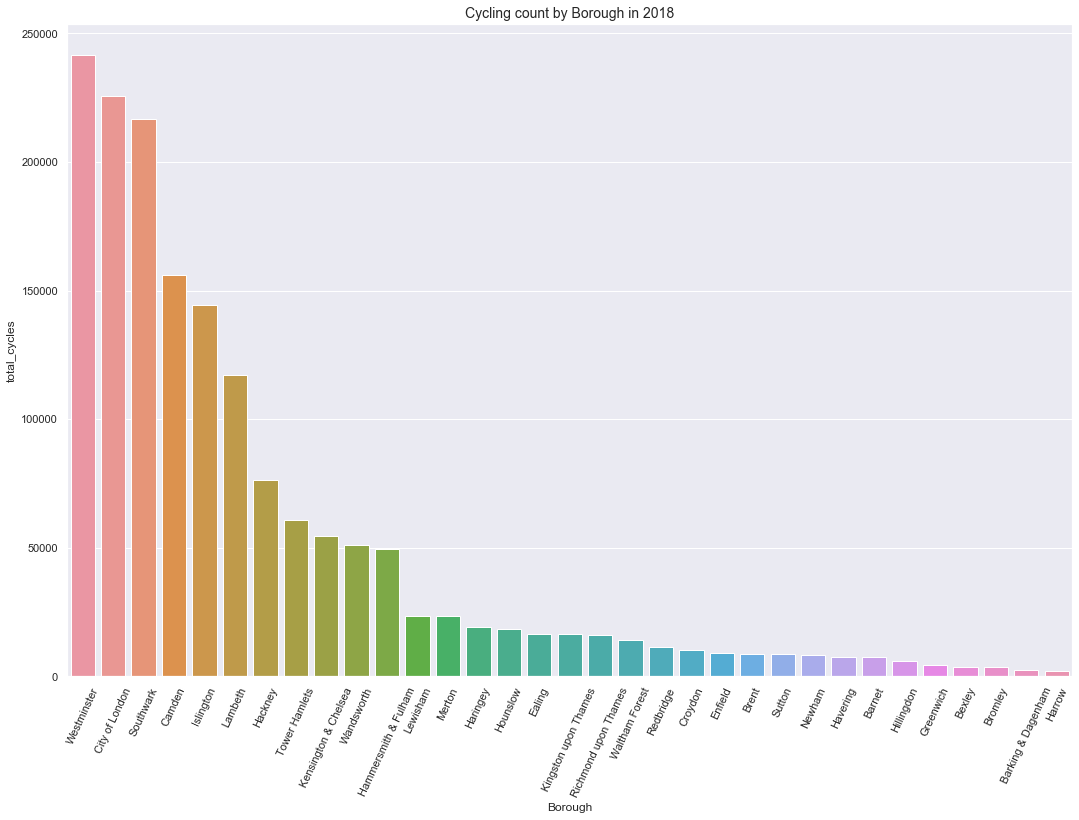

In [39]:
# Count of infrastructure by borough in 2018
cyc_2018 = all_london[(all_london["Year"] == 2018)]
borough_cyc_2018= cyc_2018.groupby(['Borough'])['total_cycles']\
.agg('sum').reset_index().sort_values('total_cycles', ascending=False)

#Barplot
sns.set(rc= {'figure.figsize':(18,12)})
sns.barplot(x='Borough', y='total_cycles', data=borough_cyc_2018)
plt.xticks(rotation=65, fontsize=11)
plt.title('Cycling count by Borough in 2018', fontsize = 14)

### Comparison of cycling in boroughs with higher and lower instalations of infrastructure.

In [40]:
# Count of cycling in Hackney
hackney = all_london[(all_london["Borough"] == "Hackney") ]

hackney_cycling= hackney.groupby(['Year'])['total_cycles']\
.agg('sum').reset_index().sort_values('total_cycles', ascending=False)
hackney_cycling['Borough'] = "Hackney"
hackney_cycling

,Year,total_cycles,Borough
7,2021,91205.0,Hackney
1,2015,80435.0,Hackney
2,2016,80221.0,Hackney
5,2019,80162.0,Hackney
3,2017,79186.0,Hackney
4,2018,76257.0,Hackney
6,2020,70375.0,Hackney
0,2014,9282.0,Hackney


In [41]:
# Count of cycling in Southwark
southwark = all_london[(all_london["Borough"] == "Southwark") ]

southwark_cycling= southwark.groupby(['Year'])['total_cycles']\
.agg('sum').reset_index().sort_values('total_cycles', ascending=False)
southwark_cycling['Borough'] = "Southwark"
southwark_cycling

,Year,total_cycles,Borough
4,2018,216781.0,Southwark
5,2019,202242.0,Southwark
3,2017,174384.0,Southwark
1,2015,155123.0,Southwark
2,2016,153222.0,Southwark
7,2021,140861.0,Southwark
0,2014,105011.0,Southwark
6,2020,54710.0,Southwark


In [42]:
# Count of cycling in Lambeth
lambeth = all_london[(all_london["Borough"] == "Lambeth") ]

lambeth_cycling= lambeth.groupby(['Year'])['total_cycles']\
.agg('sum').reset_index().sort_values('total_cycles', ascending=False)
lambeth_cycling['Borough'] = "Lambeth"
lambeth_cycling

,Year,total_cycles,Borough
5,2019,117536.0,Lambeth
4,2018,117038.0,Lambeth
1,2015,111238.0,Lambeth
2,2016,107749.0,Lambeth
3,2017,106641.0,Lambeth
7,2021,81731.0,Lambeth
0,2014,67511.0,Lambeth
6,2020,42331.0,Lambeth


In [43]:
# Count of cycling in Bexley
Bexley = all_london[(all_london["Borough"] == "Bexley") ]

Bexley_cycling= Bexley.groupby(['Year'])['total_cycles']\
.agg('sum').reset_index().sort_values('total_cycles', ascending=False)
Bexley_cycling['Borough'] = "Bexley"
Bexley_cycling

,Year,total_cycles,Borough
1,2015,3745.0,Bexley
4,2018,3651.0,Bexley
3,2017,3415.0,Bexley
2,2016,3408.0,Bexley
7,2021,3315.0,Bexley
5,2019,3171.0,Bexley
6,2020,2192.0,Bexley
0,2014,1311.0,Bexley


In [44]:
# Count of cycling in Barnet
Barnet = all_london[(all_london["Borough"] == "Barnet") ]

Barnet_cycling= Barnet.groupby(['Year'])['total_cycles']\
.agg('sum').reset_index().sort_values('total_cycles', ascending=False)
Barnet_cycling['Borough'] = "Barnet"
Barnet_cycling

,Year,total_cycles,Borough
7,2021,9033.0,Barnet
2,2016,8128.0,Barnet
3,2017,7857.0,Barnet
4,2018,7401.0,Barnet
1,2015,7152.0,Barnet
5,2019,6941.0,Barnet
6,2020,4119.0,Barnet
0,2014,1205.0,Barnet


In [45]:
# Count of cycling in Hillingdon
Hillingdon = all_london[(all_london["Borough"] == "Hillingdon") ]

Hillingdon_cycling= Barnet.groupby(['Year'])['total_cycles']\
.agg('sum').reset_index().sort_values('total_cycles', ascending=False)
Hillingdon_cycling['Borough'] = "Hillingdon"
Hillingdon_cycling

,Year,total_cycles,Borough
7,2021,9033.0,Hillingdon
2,2016,8128.0,Hillingdon
3,2017,7857.0,Hillingdon
4,2018,7401.0,Hillingdon
1,2015,7152.0,Hillingdon
5,2019,6941.0,Hillingdon
6,2020,4119.0,Hillingdon
0,2014,1205.0,Hillingdon


In [46]:
# Merge dataframes together
borough_comp= pd.concat([hackney_cycling,southwark_cycling,lambeth_cycling,Bexley_cycling,Barnet_cycling, Hillingdon_cycling])
borough_comp

,Year,total_cycles,Borough
7,2021,91205.0,Hackney
1,2015,80435.0,Hackney
2,2016,80221.0,Hackney
5,2019,80162.0,Hackney
3,2017,79186.0,Hackney
4,2018,76257.0,Hackney
6,2020,70375.0,Hackney
0,2014,9282.0,Hackney
4,2018,216781.0,Southwark
5,2019,202242.0,Southwark


Text(0.5, 1.0, 'Cycling in Certain Boroughs')

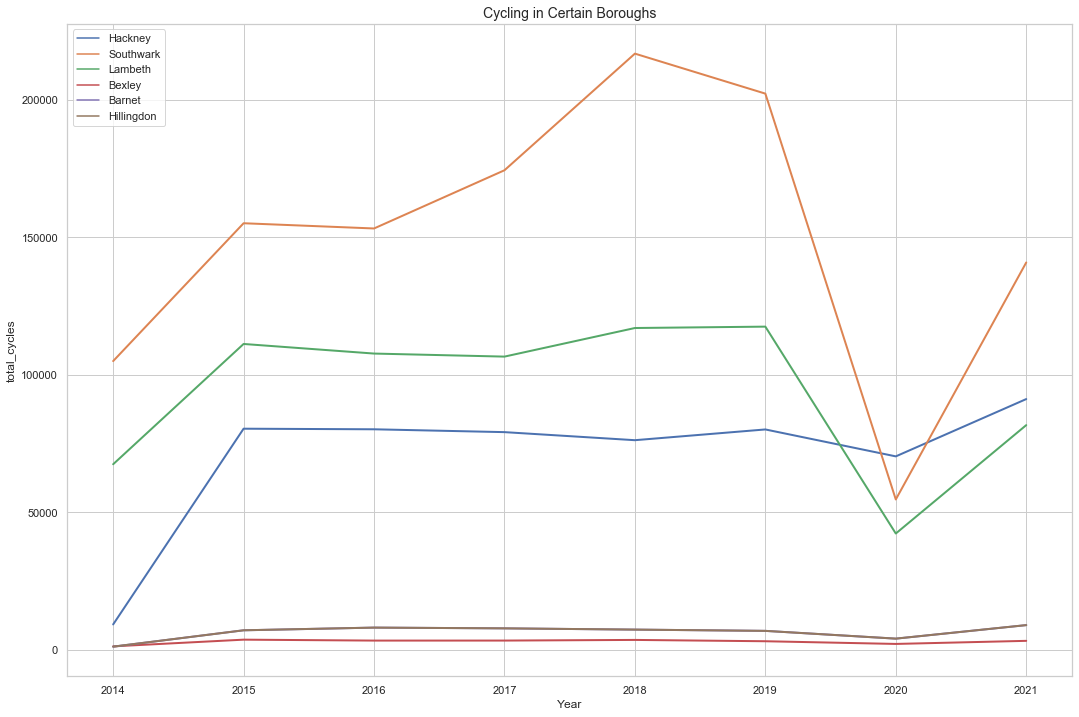

In [47]:
# Lineplot
sns.set_style('whitegrid')
sns.lineplot(x='Year', y='total_cycles', hue='Borough', data= borough_comp, linewidth=2)
plt.legend(loc='upper left')
plt.title('Cycling in Certain Boroughs', fontsize = 14)